<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 

import os
import re

from functools import reduce
from collections import defaultdict 

from scipy import stats

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 'groceries.csv',
 'match_result_test.csv',
 'ecommerce-data.csv',
 'online_retail.xlsx',
 'scanner_data.csv',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 '1_orders_dataset.csv',
 'lead_conversion.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '1_order_payments_dataset.csv',
 'sample-sales-data.csv',
 'test.csv',
 '1_customers_dataset.csv',
 'sales_vs_discount.csv',
 'sales.csv',
 'app_wau.csv',
 'cookie_cats.csv',
 'bz_data_analyis.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'mock_sales_data.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'ab_experiment.csv',
 'sample_data']

In [3]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
cnt = pd.melt(df, id_vars = ['userid','version','sum_gamerounds'], var_name = 'retention', value_name = 'result')
cnt = cnt.groupby(['version','retention','result'])['userid'].count().reset_index().rename(columns = {'userid':'cnt'})
cnt = cnt[cnt['result'] == True]
cnt.head()

,version,retention,result,cnt
1,gate_30,retention_1,True,20034
3,gate_30,retention_7,True,8502
5,gate_40,retention_1,True,20119
7,gate_40,retention_7,True,8279


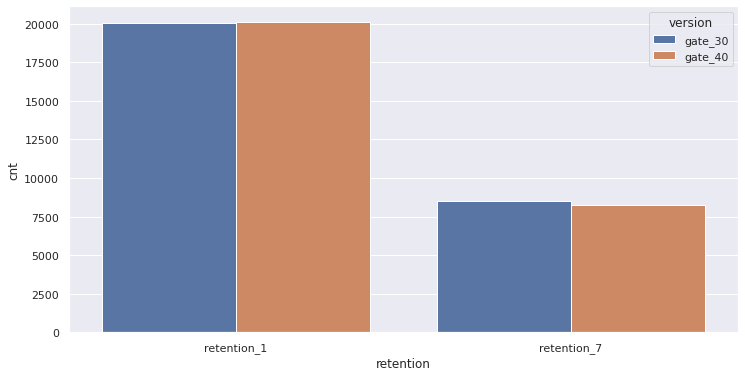

In [6]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.barplot(data = cnt, x = 'retention', y = 'cnt', hue = 'version')
plt.show()

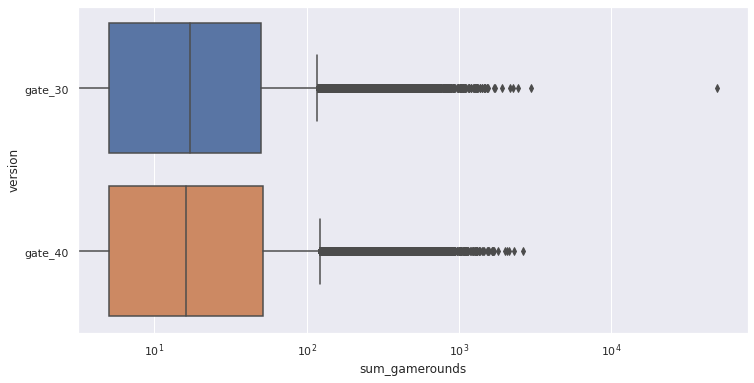

In [9]:
sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

In [10]:
df = df[df['sum_gamerounds'] < 10000]

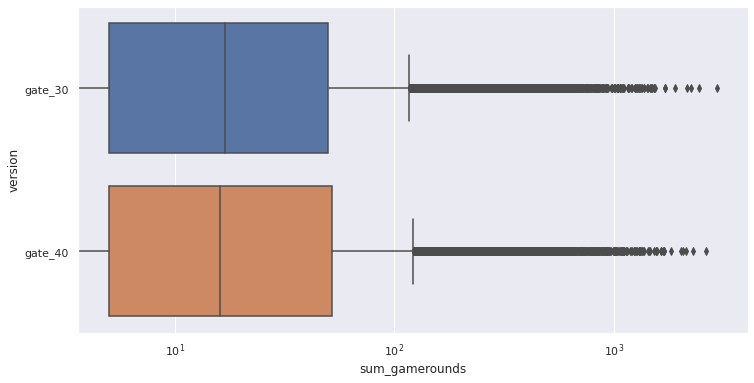

In [11]:
sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

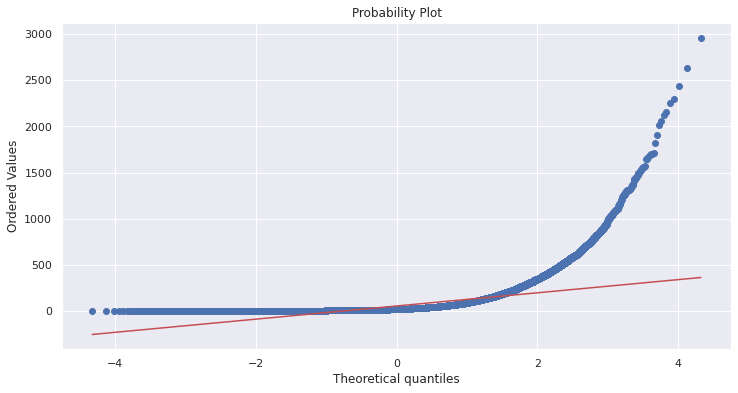

In [12]:
stats.probplot(df['sum_gamerounds'], dist = 'norm', plot = plt)
plt.show()

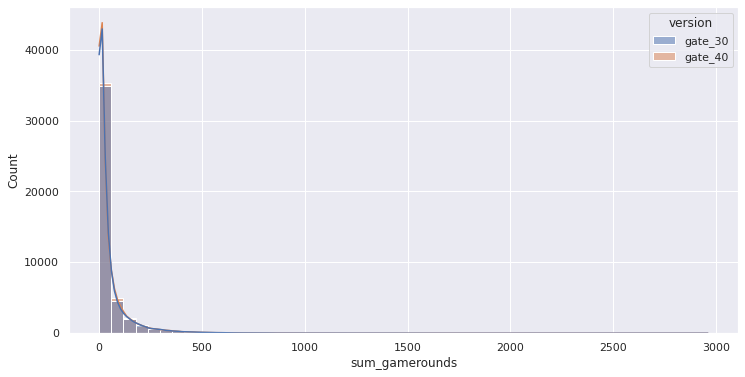

In [19]:
sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.histplot(data = df, x = 'sum_gamerounds', hue = 'version', kde = True, bins = 50)
plt.show()

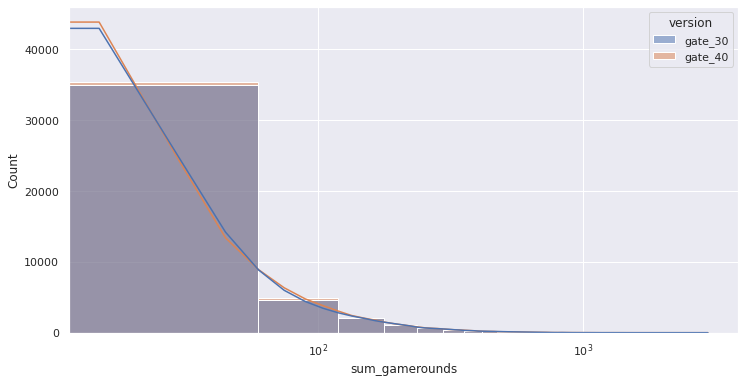

In [17]:
sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.histplot(data = df, x = 'sum_gamerounds', hue = 'version', kde = True, bins = 50)
ax.set_xscale('log')
plt.show()

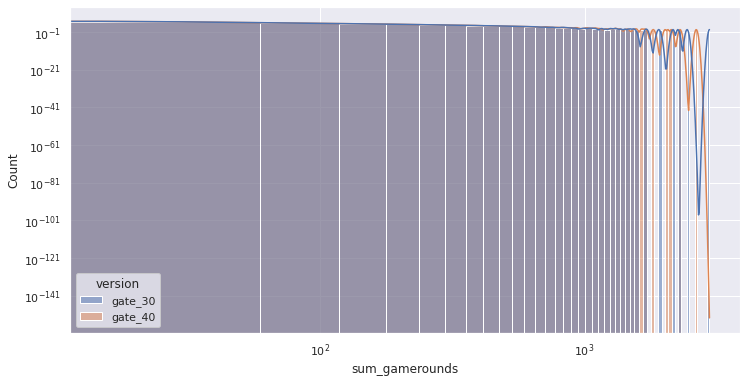

In [18]:
sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.histplot(data = df, x = 'sum_gamerounds', hue = 'version', kde = True, bins = 50)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [20]:
stat, p = stats.chisquare(df['sum_gamerounds'])
print(str(stat), '\n', str(p))

18528909.99029161 
 0.0


In [22]:
n = 1000 
boots = pd.DataFrame(
    [df.sample(frac = .1, replace = True).groupby(['version'])['sum_gamerounds'].mean() for i in range(n)]
)
boots.head()

version,gate_30,gate_40
sum_gamerounds,51.080208,52.230351
sum_gamerounds,51.263655,52.698687
sum_gamerounds,51.219702,51.277396
sum_gamerounds,53.574162,49.808566
sum_gamerounds,50.236455,51.280269


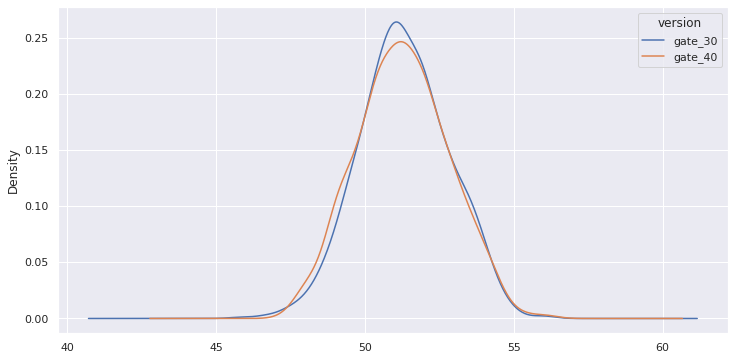

In [23]:
boots.plot.kde()

In [24]:
diff = boots['gate_30'] - boots['gate_40']
len(diff[diff > 0])/n

0.509

In [32]:
res = stats.anderson(df['sum_gamerounds'])

print(f'Anderson Statistical value : {round(res.statistic,2)}')

[f'Probably Gaussian : {cri} critical value at significant level {sig}' 
 if res.statistic < cri else
 f'Probably not Gaussian : {cri} critical value at significant level {sig}' 
 for cri, sig in zip(res.critical_values, res.significance_level)]

Anderson Statistical value : 13369.55


['Probably not Gaussian : 0.576 critical value at significant level 15.0',
 'Probably not Gaussian : 0.656 critical value at significant level 10.0',
 'Probably not Gaussian : 0.787 critical value at significant level 5.0',
 'Probably not Gaussian : 0.918 critical value at significant level 2.5',
 'Probably not Gaussian : 1.092 critical value at significant level 1.0']

In [39]:
alpha = .05
z_mean = np.mean(boots['gate_30'] - boots['gate_40'])
z_sigma = np.sqrt( np.var(boots['gate_30'])/n  + np.var(boots['gate_40'])/n )
print(f'Mean of (gate30 - gate40) : {z_mean}\nSD of (gate30 - gate40) : {z_sigma}\n'
    )

Mean of (gate30 - gate40) : 0.05414192726563455
SD of (gate30 - gate40) : 0.06813062230655606



In [40]:
np.percentile(boots['gate_30'] - boots['gate_40'], [2.5, 97.5])

array([-4.07192519,  4.03576608])

# Iterators

In [41]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [42]:
{k : f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])' for k in list(users[0].keys())}

{'mail': 'reduce(lambda acc, cur : acc + [cur["mail"]], users, [])',
 'name': 'reduce(lambda acc, cur : acc + [cur["name"]], users, [])',
 'sex': 'reduce(lambda acc, cur : acc + [cur["sex"]], users, [])',
 'age': 'reduce(lambda acc, cur : acc + [cur["age"]], users, [])'}